In [1]:
from pymongo import MongoClient
def connect_mongo():
    conn = MongoClient('localhost', 27017)

    return conn

In [1]:
def read_mongo(database, collection):
    conn = connect_mongo()
    db = conn[database] 
    data = db[collection]

    return data

In [18]:
def create_dataframe(matches):
    list_to_df = []
    for match_test in matches:
        roles = ["TOP",
            "JUNGLE",
            "MIDDLE",
            "BOTTOM",
            "UTILITY",
            "TOP",
            "JUNGLE",
            "MIDDLE",
            "BOTTOM",
            "UTILITY"]
        try:
            #Match feature 
            Data_Json = {}
            Data_Json['matchId'] = match_test['metadata']['matchId']
            Data_Json['gameDuration'] = match_test['info']['gameDuration']

            #Team feature
            for i in match_test['info']['teams']:
                team_id = i['teamId']
                if team_id == 100:
                    team = "BlueTeam"
                else:
                    team = "RedTeam"
                Data_Json[f"{team}DragonFirst"] = i['objectives']['dragon']['first']
                # Data_Json[f"{team}DragonKills"] = i['objectives']['dragon']['kills']
                Data_Json[f"{team}TowerFirst"] = i['objectives']['tower']['first']
                # Data_Json[f"{team}TowerKills"] = i['objectives']['tower']['kills']
                Data_Json[f"{team}HeraldFirst"] = i['objectives']['riftHerald']['first']
                # Data_Json[f"{team}HeraldKills"] = i['objectives']['riftHerald']['kills']
                Data_Json[f"{team}InhibitorFirst"] = i['objectives']['inhibitor']['first']
                # Data_Json[f"{team}InhibitorKills"] = i['objectives']['inhibitor']['kills']
                Data_Json[f"{team}BaronFirst"] = i['objectives']['baron']['first']
                # Data_Json[f"{team}BaronKills"] = i['objectives']['baron']['kills']
            
            #Team Win
            team_win = match_test['info']['teams'][0]['win']
            if team_win:
                Data_Json['teamWin'] = "BlueTeam"
            else:
                Data_Json['teamWin'] = "RedTeam"

            #Hero-player feature
            for participant in match_test['info']['participants']:
                if participant['teamId'] == 100:
                    team = "BlueTeam"
                else:
                    team = "RedTeam"

                Data_Json[f"{team}_{roles[0]}_championName"] = participant['championName']
                # Data_Json[f"{team}_{roles[0]}_championId"] = int(participant['championId'])
                # Data_Json[f"{team}_{roles[0]}_kills"] = int(participant['kills'])
                # Data_Json[f"{team}_{roles[0]}_deaths"] = int(participant['deaths'])
                # Data_Json[f"{team}_{roles[0]}_assists"] = int(participant['assists'])
                # Data_Json[f"{team}_{roles[0]}_visionScore"] = int(participant['visionScore'])
                # Data_Json[f"{team}_{roles[0]}_goldEarned"] = int(participant['goldEarned'])
                # Data_Json[f"{team}_{roles[0]}_champLevel"] = int(participant['champLevel'])
                # Data_Json[f"{team}_{roles[0]}_totalDamageDealt"] = int(participant['totalDamageDealt'])
                roles.pop(0)
                
            list_to_df.append(Data_Json)
        except Exception as e:
            print(e)
    return list_to_df

In [1]:
import pandas as pd

matches_br = read_mongo('LeagueOfLegends2', 'Matches').find()
list_br = create_dataframe(matches_br)
df_br = pd.DataFrame(list_br)
df_br.to_csv("brazil.csv", index=False)

matches_kr = read_mongo('LeagueOfLegends2', 'Matches_KR').find()
list_kr = create_dataframe(matches_kr)
df_kr = pd.DataFrame(list_kr)
df_kr.to_csv("korea.csv", index=False)

matches_na = read_mongo('LeagueOfLegends2', 'Matches_NA').find()
list_na = create_dataframe(matches_na)
df_na = pd.DataFrame(list_na)
df_na.to_csv("america.csv", index=False)

df = pd.concat([df_br, df_kr, df_na], ignore_index=True)

NameError: name 'read_mongo' is not defined

In [1]:
import pandas as pd
df_br = pd.read_csv('/Users/andreycunha/Library/Mobile Documents/com~apple~CloudDocs/Projetos/Personal/Learning-LOL/brazil.csv')
df_kr = pd.read_csv('/Users/andreycunha/Library/Mobile Documents/com~apple~CloudDocs/Projetos/Personal/Learning-LOL/korea.csv')
df_na = pd.read_csv('/Users/andreycunha/Library/Mobile Documents/com~apple~CloudDocs/Projetos/Personal/Learning-LOL/america.csv')
df = pd.concat([df_br, df_kr, df_na], ignore_index=True)

## Pre Processamneto

In [2]:

Q1 = df['gameDuration'].quantile(0.25)
Q3 = df['gameDuration'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['gameDuration'] < limite_inferior) | (df['gameDuration'] > limite_superior)]

print(df.shape[0])
print(outliers.shape[0])
print(df.shape[0] - outliers.shape[0])

df = df[(df['gameDuration'] > limite_inferior) | (df['gameDuration'] < limite_superior)]

212182
3107
209075


In [3]:
Q1 = df_kr['gameDuration'].quantile(0.25)
Q3 = df_kr['gameDuration'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_kr[(df_kr['gameDuration'] < limite_inferior) | (df_kr['gameDuration'] > limite_superior)]

print(df_kr.shape[0])
print(outliers.shape[0])
print(df_kr.shape[0] - outliers.shape[0])

df_kr = df_kr[(df_kr['gameDuration'] > limite_inferior) | (df_kr['gameDuration'] < limite_superior)]

79497
787
78710


In [4]:
Q1 = df_br['gameDuration'].quantile(0.25)
Q3 = df_br['gameDuration'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_br[(df_br['gameDuration'] < limite_inferior) | (df_br['gameDuration'] > limite_superior)]

print(df_br.shape[0])
print(outliers.shape[0])
print(df_br.shape[0] - outliers.shape[0])

df_br = df_br[(df_br['gameDuration'] > limite_inferior) | (df_br['gameDuration'] < limite_superior)]

66935
1305
65630


In [5]:
Q1 = df_na['gameDuration'].quantile(0.25)
Q3 = df_na['gameDuration'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_na[(df_na['gameDuration'] < limite_inferior) | (df_na['gameDuration'] > limite_superior)]

print(df_na.shape[0])
print(outliers.shape[0])
print(df_na.shape[0] - outliers.shape[0])

df_na = df_na[(df_na['gameDuration'] > limite_inferior) | (df_na['gameDuration'] < limite_superior)]

65750
1078
64672


In [6]:
elementos_distintos = sorted(df['BlueTeam_TOP_championName'].astype(str).unique())
print(len(elementos_distintos))

165


In [7]:
def getDummies(df):
    df = pd.get_dummies(df,
                        prefix=['BlueTeam_TOP_championName',
                                'BlueTeam_JUNGLE_championName',
                                'BlueTeam_MIDDLE_championName',
                                'BlueTeam_BOTTOM_championName',
                                'BlueTeam_UTILITY_championName',
                                'RedTeam_TOP_championName',
                                'RedTeam_JUNGLE_championName',
                                'RedTeam_MIDDLE_championName',
                                'RedTeam_BOTTOM_championName',
                                'RedTeam_UTILITY_championName', ],
                        columns=['BlueTeam_TOP_championName',
                                 'BlueTeam_JUNGLE_championName',
                                 'BlueTeam_MIDDLE_championName',
                                 'BlueTeam_BOTTOM_championName',
                                 'BlueTeam_UTILITY_championName',
                                 'RedTeam_TOP_championName',
                                 'RedTeam_JUNGLE_championName',
                                 'RedTeam_MIDDLE_championName',
                                 'RedTeam_BOTTOM_championName',
                                 'RedTeam_UTILITY_championName'])

    return df


In [8]:
df = getDummies(df)
df_br = getDummies(df_br)
df_kr = getDummies(df_kr)
df_na = getDummies(df_na)

In [9]:
def transform_int(df):
    df["BlueTeamDragonFirst"] = df["BlueTeamDragonFirst"][0].astype(int)
    df["RedTeamDragonFirst"] = df["RedTeamDragonFirst"][0].astype(int)

    df["BlueTeamHeraldFirst"] = df["BlueTeamHeraldFirst"][0].astype(int)
    df["RedTeamHeraldFirst"] = df["RedTeamHeraldFirst"][0].astype(int)

    df["BlueTeamTowerFirst"] = df["BlueTeamTowerFirst"][0].astype(int)
    df["RedTeamTowerFirst"] = df["RedTeamTowerFirst"][0].astype(int)

    df["BlueTeamInhibitorFirst"] = df_na["BlueTeamInhibitorFirst"][0].astype(
        int)
    df["RedTeamInhibitorFirst"] = df_na["RedTeamInhibitorFirst"][0].astype(int)

    return df


In [10]:

df = transform_int(df)
df_na = transform_int(df_na)
df_br = transform_int(df_br)
df_kr = transform_int(df_kr)

In [11]:
from sklearn import preprocessing

def labelEncoder(df):
    label_encoder = preprocessing.LabelEncoder()
    df['teamWin'] = label_encoder.fit_transform(df['teamWin'].values)
    print("Categorias encontradas: {}".format(label_encoder.classes_))
    print("Exemplo de encode de: {} e seu valor real: {}".format(df['teamWin'][0], label_encoder.inverse_transform([df['teamWin'][0]])))

    return df

In [12]:
df = labelEncoder(df)
df_br = labelEncoder(df_br)
df_na = labelEncoder(df_na)
df_kr = labelEncoder(df_kr)

Categorias encontradas: ['BlueTeam' 'RedTeam']
Exemplo de encode de: 0 e seu valor real: ['BlueTeam']
Categorias encontradas: ['BlueTeam' 'RedTeam']
Exemplo de encode de: 0 e seu valor real: ['BlueTeam']
Categorias encontradas: ['BlueTeam' 'RedTeam']
Exemplo de encode de: 1 e seu valor real: ['RedTeam']
Categorias encontradas: ['BlueTeam' 'RedTeam']
Exemplo de encode de: 0 e seu valor real: ['BlueTeam']


In [13]:
len(df.columns)

1653

# Arvore de Decisao

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

def arvore_decisao(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Cria o modelo de árvore de decisão
    clf = DecisionTreeClassifier(random_state=42)

    # Treina o modelo com os dados de treinamento
    clf.fit(X_train, y_train)

    # Faz previsões com os dados de teste
    y_pred = clf.predict(X_test)

    # Avalia a acurácia do modelo
    acc = accuracy_score(y_test, y_pred)

    # Calcula a métrica F1
    f1 = f1_score(y_test, y_pred)

    # Calcula a métrica recall
    recall = recall_score(y_test, y_pred)

    # Calcula a matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print('Acurácia:', acc)
    print('F1 score:', f1)
    print('Recall score:', recall)
    print('Confusion matrix:\n', confusion)

    # Exibir matriz de confusão com descrição verdadeira e falsa
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.show()

    # Calcular probabilidades previstas para calcular a curva ROC
    y_prob = clf.predict_proba(X_test)[:,1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo (FPR)')
    plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Calcular os Shapley Values
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test)

    # Plotar o gráfico de impacto no modelo das features
    shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display=10)  # Ajuste o valor de max_display conforme necessário

Resultados ARVORE DE DECISAO --- GENERAL
Acurácia: 0.7026415627871905
F1 score: 0.6984491122422157
Recall score: 0.6958716251607067
Confusion matrix:
 [[15204  6232]
 [ 6387 14614]]


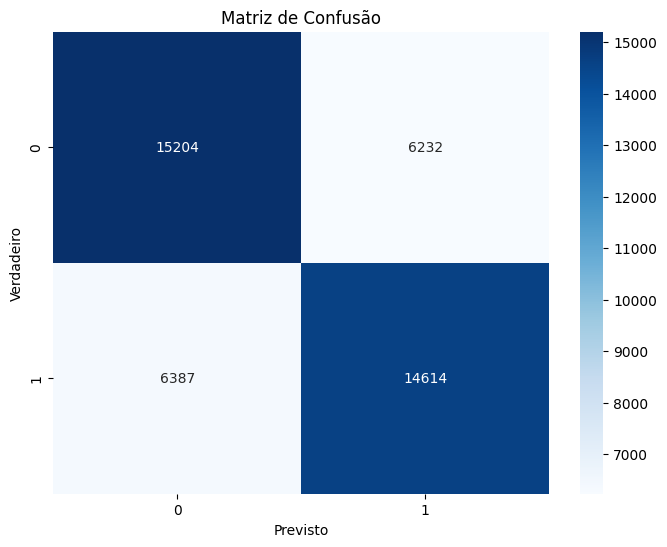

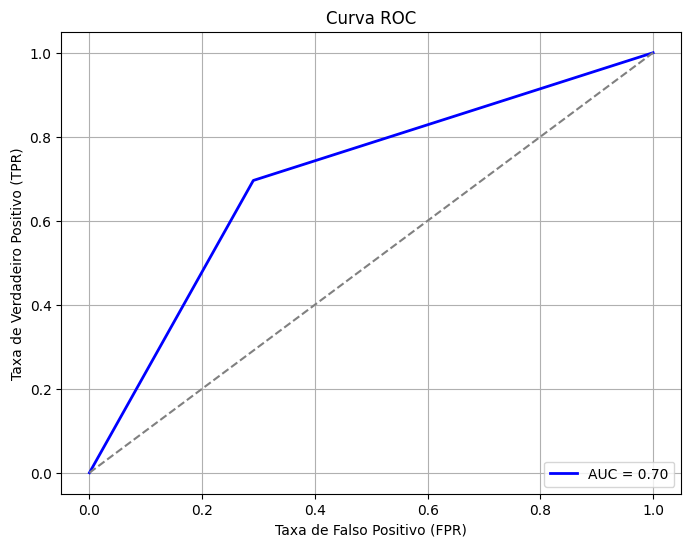

In [15]:
print("Resultados ARVORE DE DECISAO --- GENERAL")
X = df.drop(['teamWin', 'matchId'], axis=1)
y = df['teamWin']
arvore_decisao(X, y)

print("\nResultados ARVORE DE DECISAO --- BRAZIL")
X = df_br.drop(['teamWin', 'matchId'], axis=1)
y = df_br['teamWin']
arvore_decisao(X, y)

print("\nResultados ARVORE DE DECISAO --- North America")
X = df_na.drop(['teamWin', 'matchId'], axis=1)
y = df_na['teamWin']
arvore_decisao(X, y)

print("\nResultados ARVORE DE DECISAO --- KOREIA")
X = df_kr.drop(['teamWin', 'matchId'], axis=1)
y = df_kr['teamWin']
arvore_decisao(X, y)

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import shap

def naive_bayes(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Garante a nao aleatoridade dos dados/ PCA /Otimizaçao de parametros - existe pronto
    
    ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    
    # cria o modelo de árvore de decisão
    nb = GaussianNB()

    # treina o modelo com os dados de treinamento
    # nb.fit(X_train, y_train)
    nb.fit(X_train_resampled, y_train_resampled)

    # faz previsões com os dados de teste
    y_pred = nb.predict(X_test)

    # avalia a acurácia do modelo
    acc = accuracy_score(y_test, y_pred)

    # Calcular a métrica F1
    f1 = f1_score(y_test, y_pred)

    # Calcular a métrica recall
    recall = recall_score(y_test, y_pred)

    # Calcular a matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print('Acurácia:', acc)
    print('F1 score:', f1)
    print('Recall score:', recall)
    print('Confusion matrix:\n', confusion)
    
    class_probabilities = nb.theta_
    attributes = X_train.columns
    probabilities_df = pd.DataFrame(class_probabilities, columns=attributes)
    mean_probabilities = probabilities_df.mean()

    # Criando o explainer com o KernelExplainer
    explainer = shap.KernelExplainer(nb.predict_proba, X_train_resampled)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test, feature_names=X.columns)
    #Cross Validation
    # scores = cross_val_score(nb, X, y, cv=5)

    # # Imprimir as métricas de avaliação médias
    # print("Acurácia média: {:.2f}%".format(scores.mean() * 100))
    # print("Desvio padrão: {:.2f}%".format(scores.std() * 100))

In [26]:
print("Resultados NAIVE BAYES --- GENERAL")
X = df.drop(['teamWin', 'matchId'], axis=1)
y = df['teamWin']
naive_bayes(X, y)

print("\nResultados NAIVE BAYES --- BRAZIL")
X = df_br.drop(['teamWin', 'matchId'], axis=1)
y = df_br['teamWin']
naive_bayes(X, y)

print("\nResultados NAIVE BAYES --- North America")
X = df_na.drop(['teamWin', 'matchId'], axis=1)
y = df_na['teamWin']
naive_bayes(X, y)

print("\nResultados NAIVE BAYES --- KOREIA")
X = df_kr.drop(['teamWin', 'matchId'], axis=1)
y = df_kr['teamWin']
naive_bayes(X, y)

Resultados NAIVE BAYES --- GENERAL
Acurácia: 0.733204514928011
F1 score: 0.6784253578732106
Recall score: 0.5686872053711728
Confusion matrix:
 [[19172  2264]
 [ 9058 11943]]


Using 170858 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/42437 [00:00<?, ?it/s]

# MLPC CLASSIFIER

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

def MLPC(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Garante a nao aleatoridade dos dados/ PCA /Otimizaçao de parametros - existe pronto

    # cria o modelo de árvore de decisão
    mlpc = MLPClassifier()

    # treina o modelo com os dados de treinamento
    mlpc.fit(X_train, y_train)

    # faz previsões com os dados de teste
    y_pred = mlpc.predict(X_test)

    # avalia a acurácia do modelo
    acc = accuracy_score(y_test, y_pred)

    # Calcular a métrica F1
    f1 = f1_score(y_test, y_pred)

    # Calcular a métrica recall
    recall = recall_score(y_test, y_pred)

    # Calcular a matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print('Acurácia:', acc)
    print('F1 score:', f1)
    print('Recall score:', recall)
    print('Confusion matrix:\n', confusion)

    #Cross Validation
    scores = cross_val_score(mlpc, X, y, cv=5)

    # Imprimir as métricas de avaliação médias
    # print("Acurácia média: {:.2f}%".format(scores.mean() * 100))
    # print("Desvio padrão: {:.2f}%".format(scores.std() * 100))

In [41]:
print("Resultados MLPC --- GENERAL")
X = df.drop(['teamWin', 'matchId'], axis=1)
y = df['teamWin']
MLPC(X, y)

print("\nResultados MLPC--- BRAZIL")
X = df_br.drop(['teamWin', 'matchId'], axis=1)
y = df_br['teamWin']
MLPC(X, y)

print("\nResultados NAIVE BAYES --- North America")
X = df_na.drop(['teamWin', 'matchId'], axis=1)
y = df_na['teamWin']
MLPC(X, y)

print("\nResultados NAIVE BAYES --- KOREIA")
X = df_kr.drop(['teamWin', 'matchId'], axis=1)
y = df_kr['teamWin']
MLPC(X, y)

Resultados MLPC --- GENERAL


/Users/andreycunha/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Acurácia: 0.7494167825246837
F1 score: 0.7645261293179805
Recall score: 0.8220084757868673
Confusion matrix:
 [[14540  6896]
 [ 3738 17263]]


# Regressao Logistica

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import shap

def regressao_logistica(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Garante a não aleatoriedade dos dados/ PCA / Otimização de parâmetros - existe pronto

    # Normalização dos dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Cria o modelo de regressão logística
    lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

    # Treina o modelo com os dados de treinamento
    lr.fit(X_train, y_train)

    # Faz previsões com os dados de teste
    y_pred = lr.predict(X_test)

    # Avalia a acurácia do modelo
    acc = accuracy_score(y_test, y_pred)

    # Calcula a métrica F1
    f1 = f1_score(y_test, y_pred)

    # Calcula a métrica recall
    recall = recall_score(y_test, y_pred)

    # Calcula a matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print('Acurácia:', acc)
    print('F1 score:', f1)
    print('Recall score:', recall)
    print('Confusion matrix:\n', confusion)

    # Exibe matriz de confusão com descrição verdadeira e falsa
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.show()

    # Calcula probabilidades previstas para calcular a curva ROC
    y_prob = lr.predict_proba(X_test)[:,1]

    # Calcula a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo (FPR)')
    plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Calcular os Shapley Values
    explainer = shap.Explainer(lr, X_train)
    shap_values = explainer(X_test)

    # Plotar o gráfico de impacto no modelo das features
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)
    # coefficients = lr.coef_
    # print(coefficients)
    # data = {'Atributo': X.columns.tolist(), 'Coeficiente': coefficients[0]}
    # df_coef = pd.DataFrame(data)
    # top_10 = df_coef.nlargest(10, 'Coeficiente')
    # plt.figure(figsize=(10, 6))
    # sns.barplot(x='Coeficiente', y='Atributo', data=top_10, orient='h')
    # plt.title('Top 10 Atributos com Maiores Coeficientes (Regressão Logística)')
    # plt.xlabel('Coeficiente')
    # plt.ylabel('Atributo')
    # plt.show()
    #Cross Validation
    # scores = cross_val_score(lr, X, y, cv=5)

    # Imprimir as métricas de avaliação médias
    # print("Acurácia média: {:.2f}%".format(scores.mean() * 100))
    # print("Desvio padrão: {:.2f}%".format(scores.std() * 100))

Resultados regressao_logistica --- GENERAL
Acurácia: 0.7495581685793058
F1 score: 0.7537420640437462
Recall score: 0.7744869291938479
Confusion matrix:
 [[15544  5892]
 [ 4736 16265]]


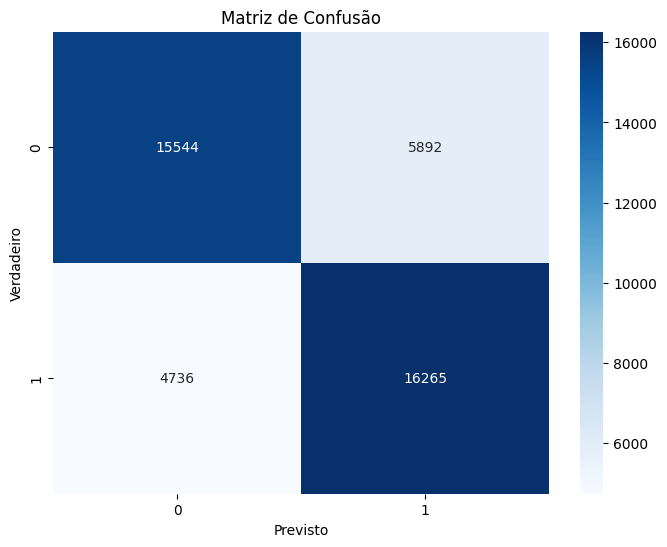

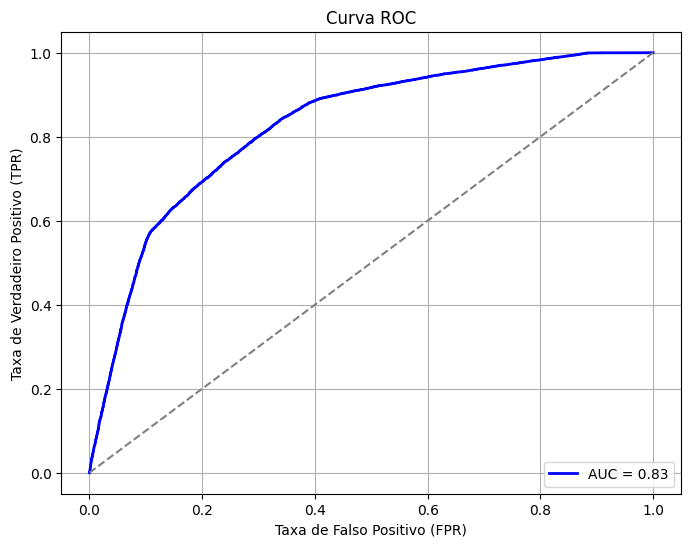

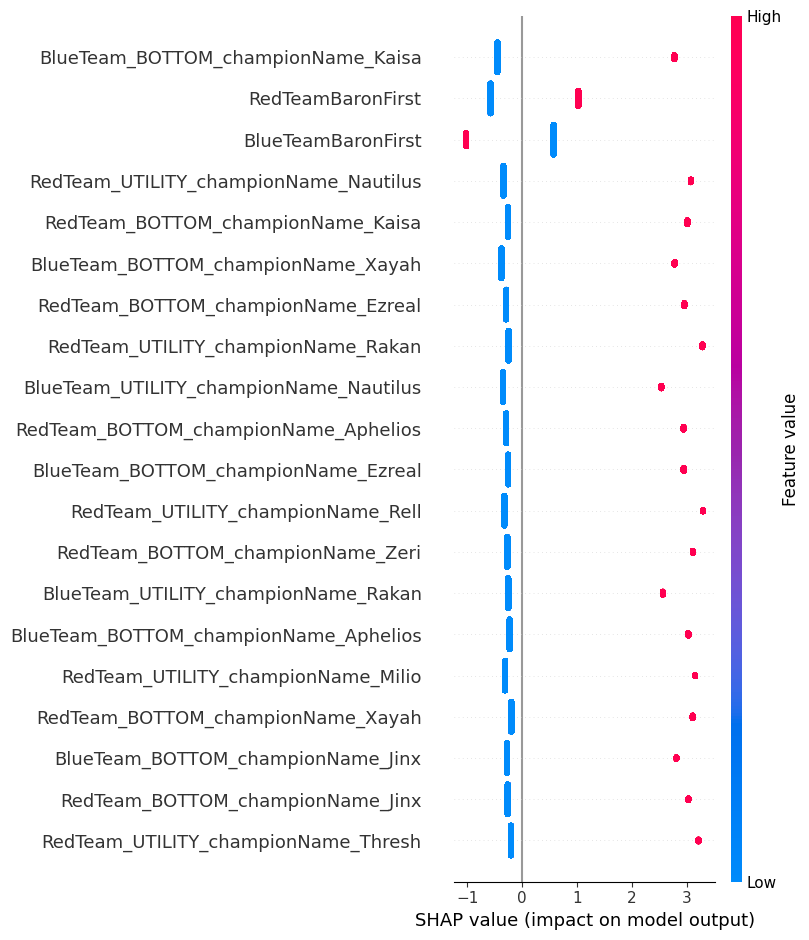


Resultados regressao_logistica --- BRAZIL
Acurácia: 0.7567042653320385
F1 score: 0.7505170432784374
Recall score: 0.7639170435053797
Confusion matrix:
 [[5231 1743]
 [1514 4899]]


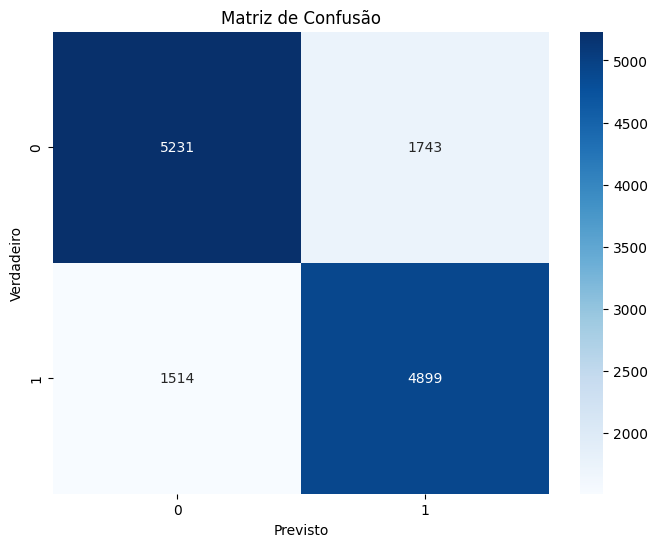

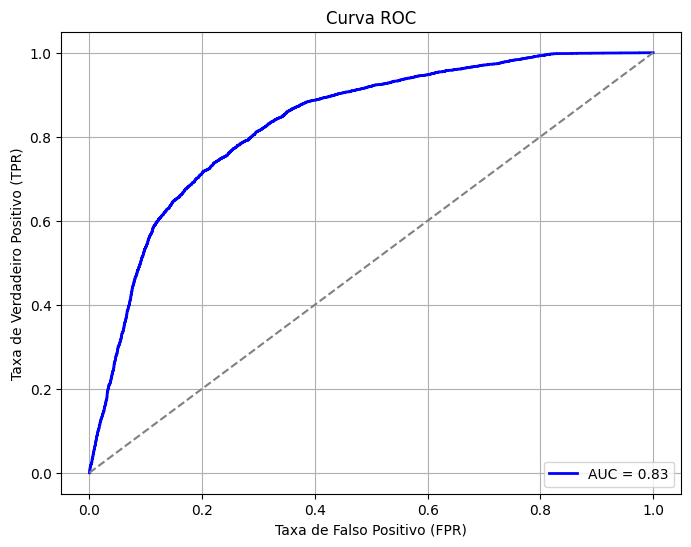

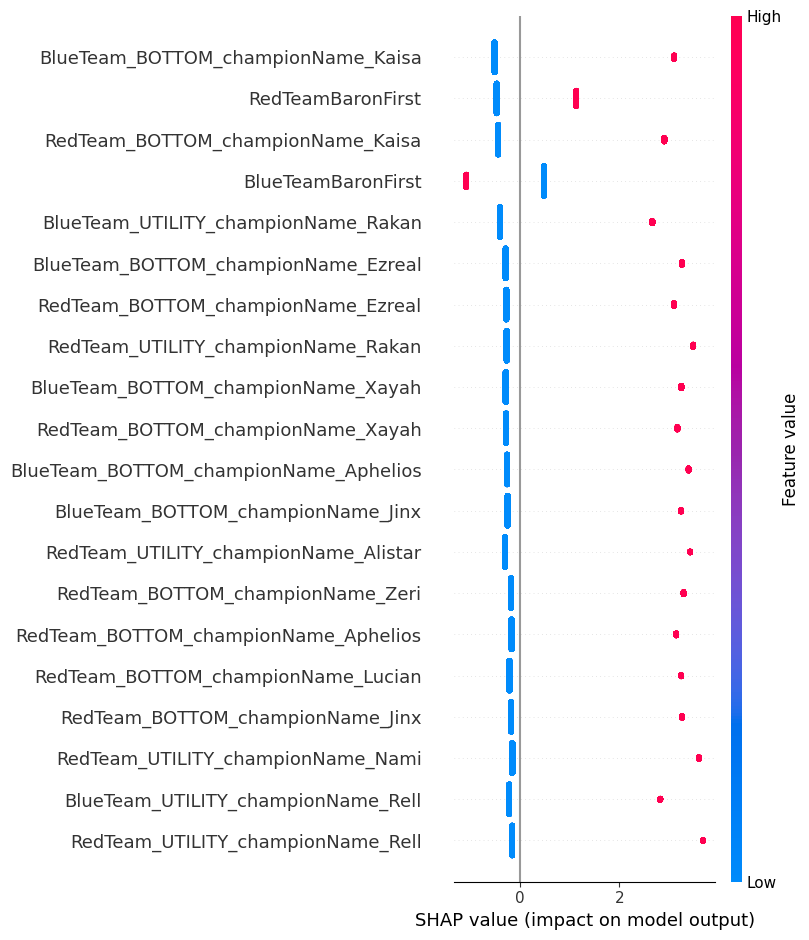


Resultados regressao_logistica --- North America
Acurácia: 0.7514068441064639
F1 score: 0.7538588961674573
Recall score: 0.7625285605483625
Confusion matrix:
 [[4875 1710]
 [1559 5006]]


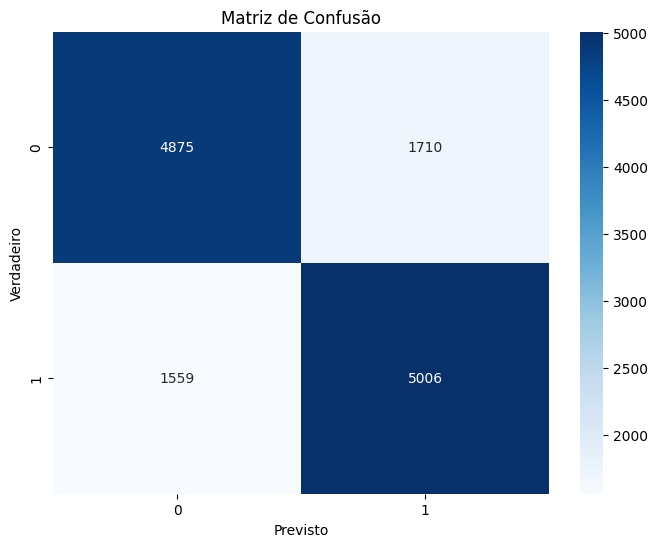

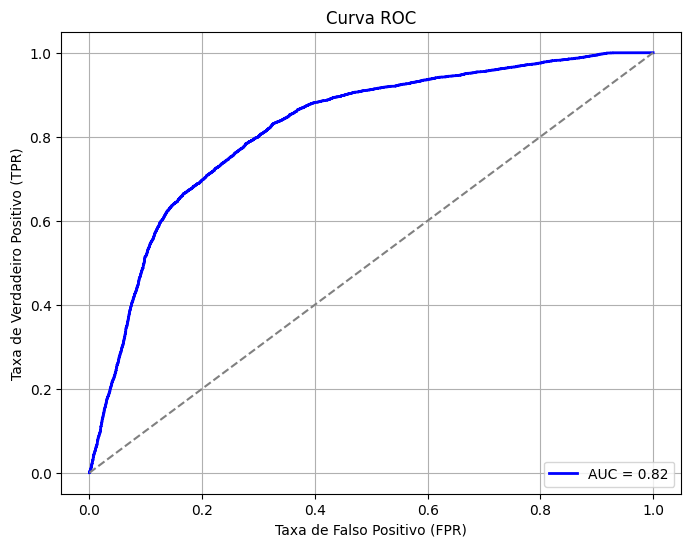

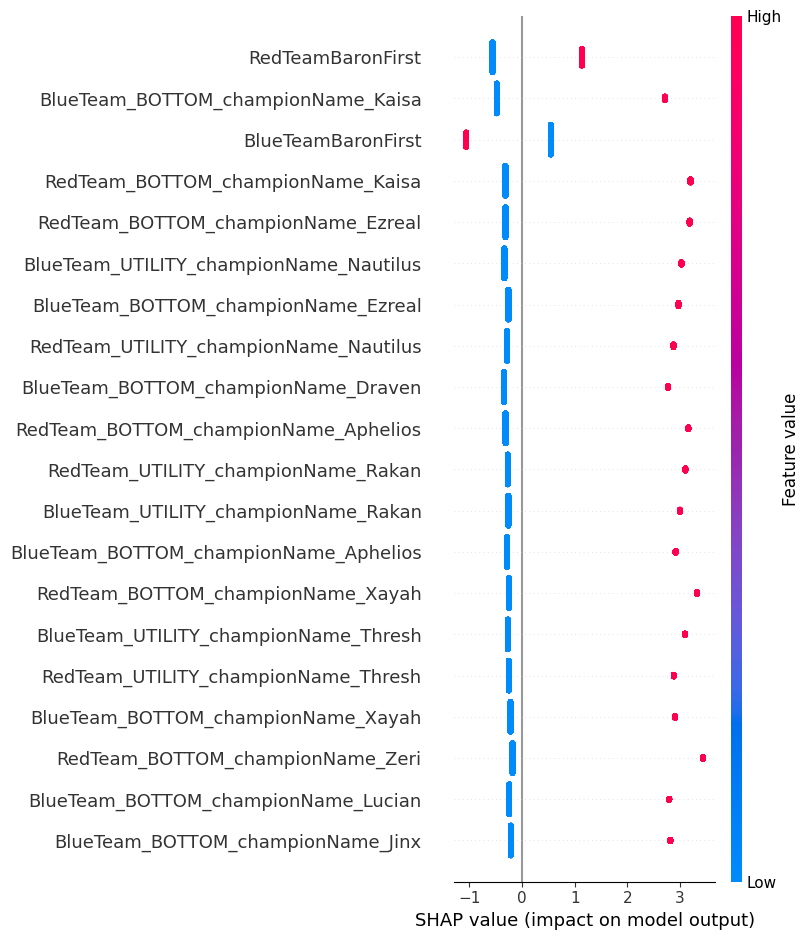


Resultados regressao_logistica --- KOREIA
Acurácia: 0.7275471698113207
F1 score: 0.73681652490887
Recall score: 0.7571482082657011
Confusion matrix:
 [[5504 2387]
 [1945 6064]]


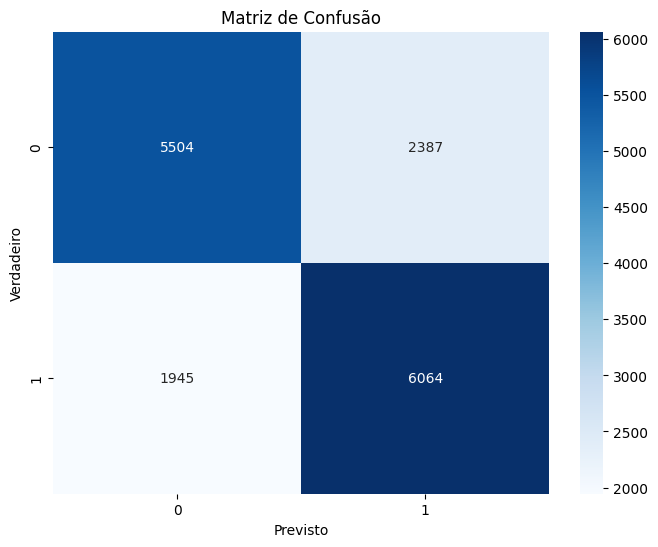

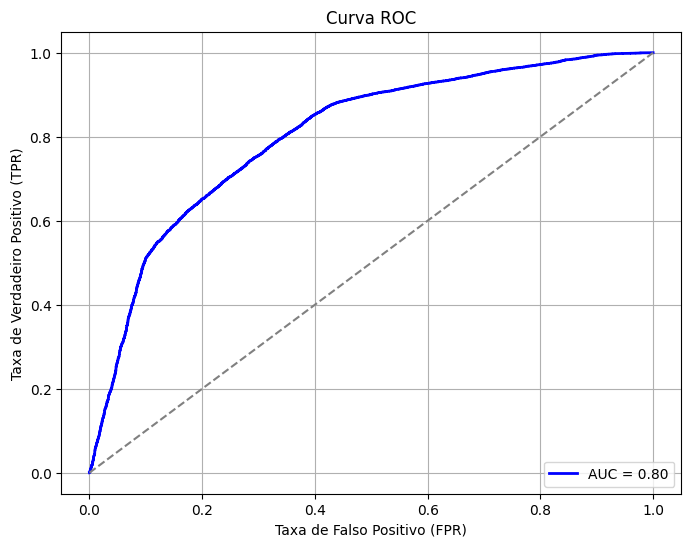

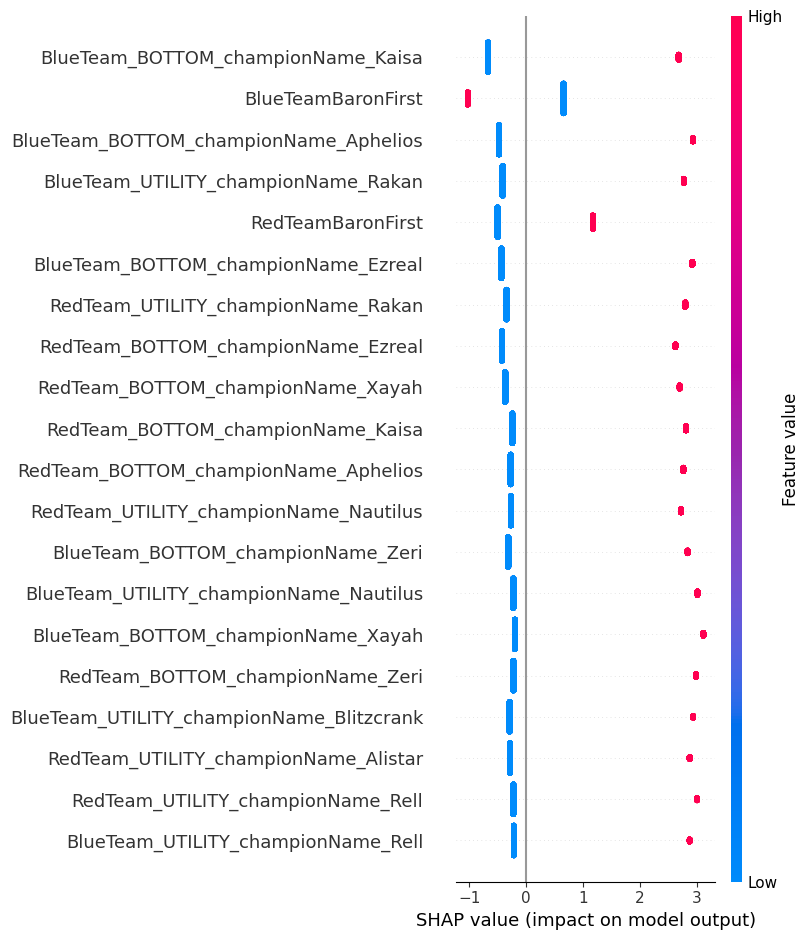

In [47]:
print("Resultados regressao_logistica --- GENERAL")
X = df.drop(['teamWin', 'matchId'], axis=1)
y = df['teamWin']
regressao_logistica(X, y)

print("\nResultados regressao_logistica --- BRAZIL")
X = df_br.drop(['teamWin', 'matchId'], axis=1)
y = df_br['teamWin']
regressao_logistica(X, y)

print("\nResultados regressao_logistica --- North America")
X = df_na.drop(['teamWin', 'matchId'], axis=1)
y = df_na['teamWin']
regressao_logistica(X, y)

print("\nResultados regressao_logistica --- KOREIA")
X = df_kr.drop(['teamWin', 'matchId'], axis=1)
y = df_kr['teamWin']
regressao_logistica(X, y)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

X = df.drop(['teamWin', 'matchId'], axis=1)
y = df['teamWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Garante a nao aleatoridade dos dados/ PCA /Otimizaçao de parametros - existe pronto

# cria o modelo de árvore de decisão
svc = SVC()

# treina o modelo com os dados de treinamento
svc.fit(X_train, y_train)

# faz previsões com os dados de teste
y_pred = svc.predict(X_test)

# avalia a acurácia do modelo
acc = accuracy_score(y_test, y_pred)

# Calcular a métrica F1
f1 = f1_score(y_test, y_pred)

# Calcular a métrica recall
recall = recall_score(y_test, y_pred)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

print('Acurácia:', acc)
print('F1 score:', f1)
print('Recall score:', recall)
print('Confusion matrix:\n', confusion)

#Cross Validation
scores = cross_val_score(svc, X, y, cv=5)

# Imprimir as métricas de avaliação médias
# print("Acurácia média: {:.2f}%".format(scores.mean() * 100))
# print("Desvio padrão: {:.2f}%".format(scores.std() * 100))

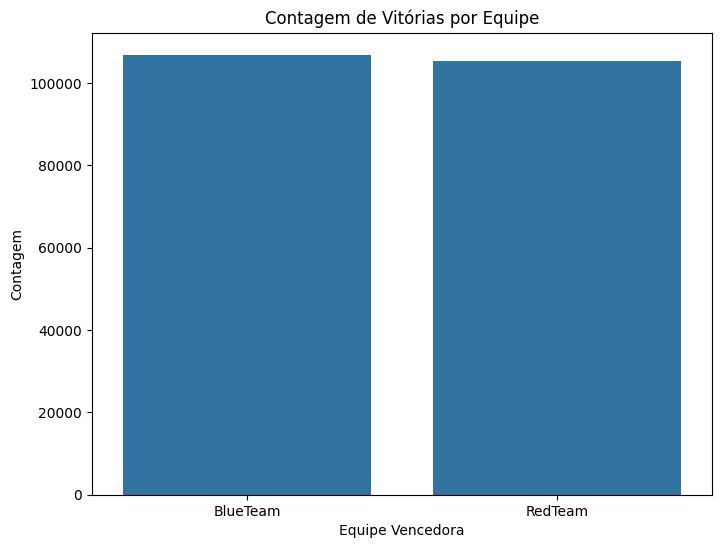

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='teamWin')
plt.title('Contagem de Vitórias por Equipe')
plt.xlabel('Equipe Vencedora')
plt.ylabel('Contagem')
plt.show()


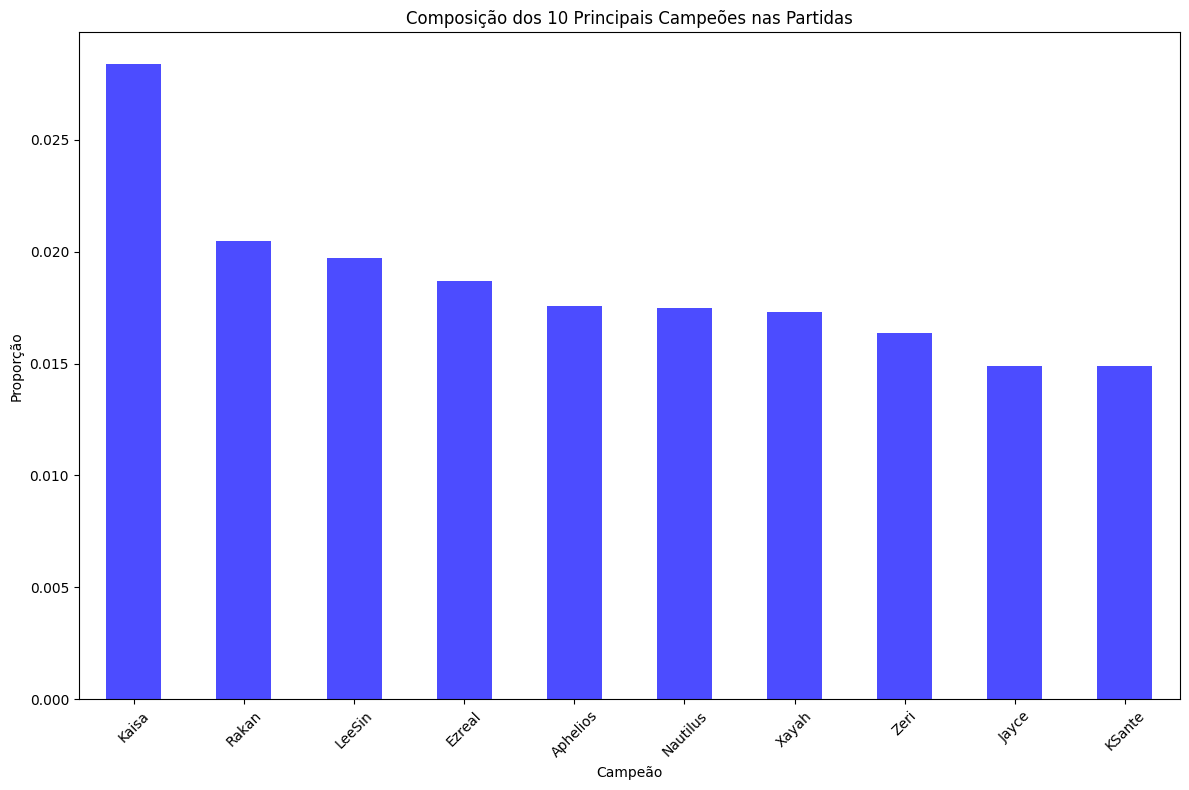

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as primeiras 120 mil partidas
data = df.head(120000)

# Selecionar apenas as colunas dos campeões
champions_columns = [col for col in data.columns if 'championName' in col]

# Criar uma nova Series com todas as ocorrências de campeões em todas as posições de cada equipe
all_champions = pd.concat([data[col] for col in champions_columns])

# Contar a ocorrência de cada campeão
champions_counts = all_champions.value_counts()

# Normalizar os valores para a proporção de uso de cada campeão
champions_proportions = champions_counts / champions_counts.sum()

# Selecionar os 10 campeões mais comuns
top_champions = champions_proportions.head(10)

# Plotar a composição dos campeões nas partidas
plt.figure(figsize=(12, 8))
top_champions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Composição dos 10 Principais Campeões nas Partidas')
plt.xlabel('Campeão')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

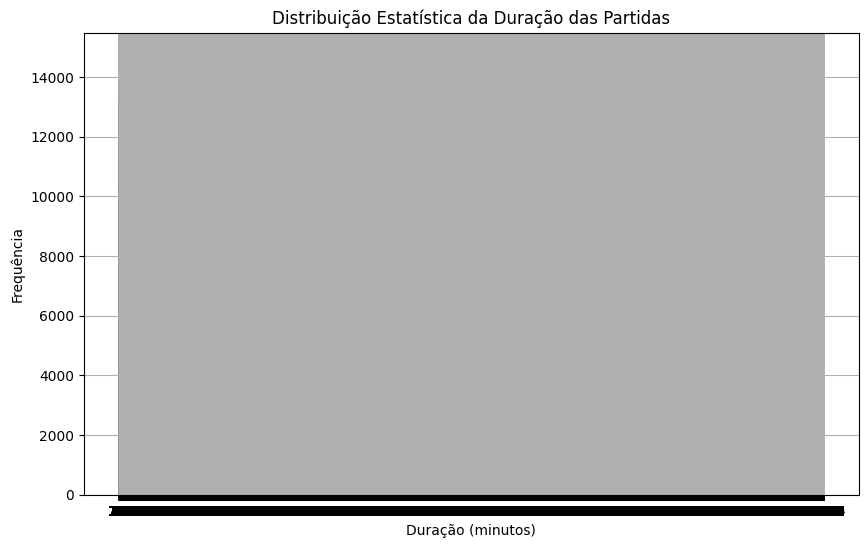

In [13]:
import numpy as np
data = df
data['gameDuration_minutes'] = np.round(data['gameDuration'] / 60)

# Plotar o gráfico da distribuição estatística da duração das partidas em minutos
plt.figure(figsize=(10, 6))
plt.hist(data['gameDuration_minutes'], bins=range(int(data['gameDuration_minutes'].min()), int(data['gameDuration_minutes'].max()) + 1), color='skyblue', edgecolor='black')
plt.title('Distribuição Estatística da Duração das Partidas')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.xticks(range(int(data['gameDuration_minutes'].min()), int(data['gameDuration_minutes'].max()) + 1))
plt.show()